**Обработка изображений** Лабораторная работа №4 (Виничук Тимофей)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [26]:
def uniformity(image, x, y, width, height, threshold):
    region = image[y:y+height, x:x+width]
    if np.var(region) < threshold:
        return True
    else:
        return False

In [27]:
def merge_regions(image, mask, x, y, width, height):
    # Объединяем регионы путем установки их значений в среднее значение яркости
    region_mean = np.mean(image[y:y+height, x:x+width])
    image[y:y+height, x:x+width] = region_mean
    
    # Отмечаем область региона, как обработанную
    mask[y:y+height, x:x+width] = 255

In [28]:
def split_and_merge_recursive(image, mask, x, y, width, height, min_region_size, threshold):
    # Разделение региона
    if width * height > min_region_size and not uniformity(image, x, y, width, height, threshold):
        # Разделяем регион пополам по вертикали
        if width > height:
            mid = x + width // 2
            split_and_merge_recursive(image, mask, x, y, mid - x, height, min_region_size, threshold)
            split_and_merge_recursive(image, mask, mid, y, width - (mid - x), height, min_region_size, threshold)
        # Разделяем регион пополам по горизонтали
        else:
            mid = y + height // 2
            split_and_merge_recursive(image, mask, x, y, width, mid - y, min_region_size, threshold)
            split_and_merge_recursive(image, mask, x, mid, width, height - (mid - y), min_region_size, threshold)
    else:
        merge_regions(image, mask, x, y, width, height)

    

In [29]:
def split_and_merge(image, min_region_size, threshold):
    # Создаем маску для отслеживания уже обработанных регионов
   
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY ) 
    image = cv2.GaussianBlur(image, (5,5), 0);
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    # Вызываем функцию разделения и объединения регионов
    split_and_merge_recursive(image, mask, 0, 0, image.shape[1], image.shape[0], min_region_size, threshold)
    return image

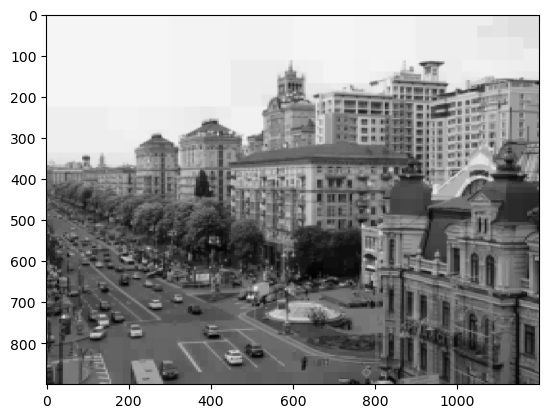

In [30]:
image = cv2.imread('Example_Split&Merge_1.jpg', cv2.IMREAD_GRAYSCALE)
#image = cv2.GaussianBlur(image, (5,1), 0);
image = split_and_merge(image, min_region_size=20,threshold=50)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.show()

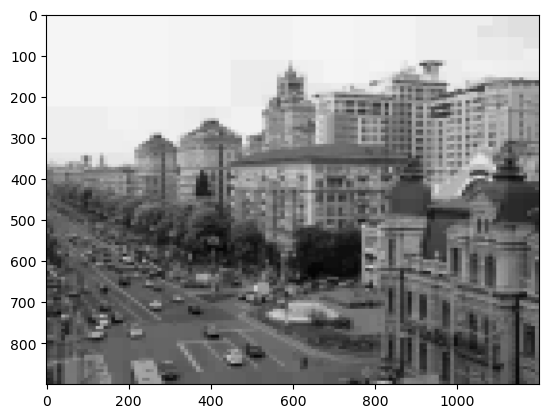

In [31]:
image = cv2.imread('Example_Split&Merge_1.jpg', cv2.IMREAD_GRAYSCALE)
#image = cv2.GaussianBlur(image, (5,1), 0);
image = split_and_merge(image, min_region_size=100,threshold=50)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.show()

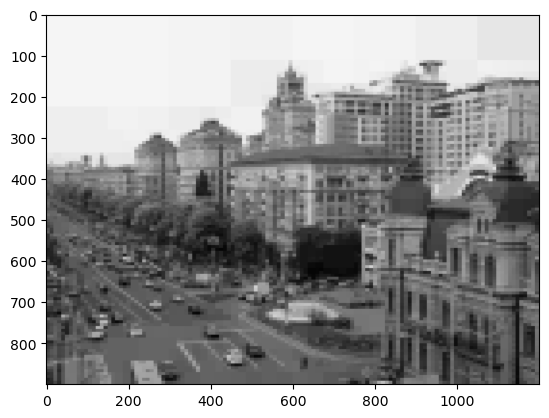

In [32]:
image = cv2.imread('Example_Split&Merge_1.jpg', cv2.IMREAD_GRAYSCALE)
#image = cv2.GaussianBlur(image, (5,1), 0);
image = split_and_merge(image, min_region_size=100,threshold=90)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.show()